In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import warnings

warnings.filterwarnings("ignore")

In [2]:
datas = pd.read_csv('600905.csv')
BSI1 = datas[['BSI1', 'openNR', 'closeNR', 'highNR', 'lowNR']]
BSI2 = datas[['BSI2', 'openNR', 'closeNR', 'highNR', 'lowNR']]
BSI3 = datas[['BSI3', 'openNR', 'closeNR', 'highNR', 'lowNR']]
BSI4 = datas[['BSI4', 'openNR', 'closeNR', 'highNR', 'lowNR']]
BSI5 = datas[['BSI5', 'openNR', 'closeNR', 'highNR', 'lowNR']]
BSI6 = datas[['BSI6', 'openNR', 'closeNR', 'highNR', 'lowNR']]
y = datas['label'].values

In [3]:
def Train(name, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    model = XGBClassifier()
    eval_set = [(x_test, y_test)]
    model.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=False)
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print(name + " Accuracy: %.2f%%" % (accuracy * 100.0))
    print(model.get_params())
    plot_importance(model)
    plt.show()

In [4]:
# i = 0
# name = ['BSI1', 'BSI2', 'BSI3', 'BSI4', 'BSI5', 'BSI6']
# for df in [BSI1, BSI2, BSI3, BSI4, BSI5, BSI6]:
#     x = df.values
#     Train(name[i], x, y)
#     i += 1

BSI6 Accuracy: 83.33%
{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


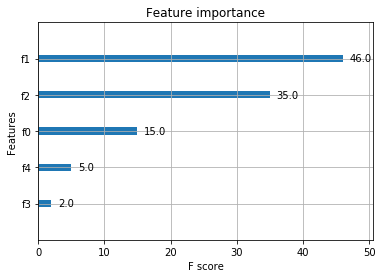

In [74]:
Train('BSI6', BSI6.values, y)